逐次二次計画法を使って解いた、SLSQPでは勾配ベクトルを使うがヘシアン行列は使わない

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み、一行目はヘッダーじゃない
df = pd.read_csv("output.csv",header=None)
#クラスタ数宣言
c=2
#Kはクラスタサイズ
K=5
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納

X_size,dimension = X.shape

centroids = X[np.random.choice(X_size,c)]
distances=np.zeros((X_size,c))

In [70]:
#pにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
p=[]
for i in range(X_size):
    for j in range(c):
        p.append(np.sum((X[i]-centroids[j])**2))
#p = [0.0000000001 if i == 0 else i for i in p]
print(p)

[0.0007403055559999994, 0.03822570388899998, 0.00010901555600000018, 0.032134479444999975, 0.027225695555999976, 0.00010137944500000041, 0.0, 0.030344904444999977, 0.041001691111999986, 0.08168416388899997, 0.030344904444999977, 0.0, 0.10412108497800004, 0.14067954388900006, 0.009999999999999995, 0.04101150444499998, 0.02751202444500001, 0.05780138777800003, 0.04569999999999999, 0.08857832444499997]


In [71]:
centroids

array([[0.520833, 0.519167],
       [0.5175  , 0.693333]])

In [72]:
%matplotlib inline
import seaborn as sns
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})

from scipy.optimize import minimize
import scipy as sp
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [73]:
#逐次二次計画法の関数定義（scipy optimize）
def f(x,args ):
    v = args[0]*(x[0]**3)+args[1]*(x[1]**3)+args[2]*(x[2]**3)+args[3]*(x[3]**3)+args[4]*(x[4]**3)+\
        args[5]*(x[5]**3)+args[6]*(x[6]**3)+args[7]*(x[7]**3)+args[8]*(x[8]**3)+args[9]*(x[9]**3)+\
        args[10]*(x[10]**3)+args[11]*(x[11]**3)+args[12]*(x[12]**3)+args[13]*(x[13]**3)+args[14]*(x[14]**3)+\
        args[15]*(x[15]**3)+args[16]*(x[16]**3)+args[17]*(x[17]**3)+args[18]*(x[18]**3)+args[19]*(x[19]**3)
    return(v)

def grad(x,args):
    delx0  = 3*args[0]*x[0]**2
    delx1  = 3*args[1]*x[1]**2
    delx2  = 3*args[2]*x[2]**2
    delx3  = 3*args[3]*x[3]**2
    delx4  = 3*args[4]*x[4]**2
    delx5  = 3*args[5]*x[5]**2
    delx6  = 3*args[6]*x[6]**2
    delx7  = 3*args[7]*x[7]**2
    delx8  = 3*args[8]*x[8]**2
    delx9  = 3*args[9]*x[9]**2
    delx10 = 3*args[10]*x[10]**2
    delx11 = 3*args[11]*x[11]**2
    delx12 = 3*args[12]*x[12]**2
    delx13 = 3*args[13]*x[13]**2
    delx14 = 3*args[14]*x[14]**2
    delx15 = 3*args[15]*x[15]**2
    delx16 = 3*args[16]*x[16]**2
    delx17 = 3*args[17]*x[17]**2
    delx18 = 3*args[18]*x[18]**2
    delx19 = 3*args[19]*x[19]**2
    g = np.array([delx0,delx1,delx2,delx3,delx4,delx5,delx6,delx7,delx8,\
                 delx9,delx10,delx11,delx12,delx13,delx14,delx15,delx16,delx17,\
                 delx18,delx19])
    return(g)

def hess(x,args):
    delxx0 = 6*args[0]*x[0]
    delxx1 = 6*args[1]*x[1]
    delxx2 = 6*args[2]*x[2]
    delxx3 = 6*args[3]*x[3]
    delxx4 = 6*args[4]*x[4]
    delxx5 = 6*args[5]*x[5]
    delxx6 = 6*args[6]*x[6]
    delxx7 = 6*args[7]*x[7]
    delxx8 = 6*args[8]*x[8]
    delxx9 = 6*args[9]*x[9]
    delxx10 = 6*args[10]*x[10]
    delxx11 = 6*args[11]*x[11]
    delxx12 = 6*args[12]*x[12]
    delxx13 = 6*args[13]*x[13]
    delxx14 = 6*args[14]*x[14]
    delxx15 = 6*args[15]*x[15]
    delxx16 = 6*args[16]*x[16]
    delxx17 = 6*args[17]*x[17]
    delxx18 = 6*args[18]*x[18]
    delxx19 = 6*args[19]*x[19]
    h_diag = np.array([delxx0,delxx1,delxx2,delxx3,delxx4,delxx5,delxx6,delxx7,delxx8,\
                 delxx9,delxx10,delxx11,delxx12,delxx13,delxx14,delxx15,delxx16,delxx17,\
                 delxx18,delxx19])
    
    h = np.diag(h_diag)
    return(h)

args = p#argsにクラスタ中心とデータ間の距離d_ki
x0 = [0.5 for i in range(20)]

In [74]:
#制約条件、等式の場合はeq
cons = ({"type":"eq","fun": lambda x: x[0]+x[1]-1},
        {"type":"eq","fun": lambda x: x[2]+x[3]-1},
        {"type":"eq","fun": lambda x: x[4]+x[5]-1},
        {"type":"eq","fun": lambda x: x[6]+x[7]-1},
        {"type":"eq","fun": lambda x: x[8]+x[9]-1},
        {"type":"eq","fun": lambda x: x[10]+x[11]-1},
        {"type":"eq","fun": lambda x: x[12]+x[13]-1},
        {"type":"eq","fun": lambda x: x[14]+x[15]-1},
        {"type":"eq","fun": lambda x: x[16]+x[17]-1},
        {"type":"eq","fun": lambda x: x[18]+x[19]-1},
        {"type":"eq","fun":lambda x:x[0]+x[2]+x[4]+x[6]+x[8]+x[10]+x[12]+x[14]+x[16]+x[18]-5},
        {"type":"eq","fun":lambda x:x[1]+x[3]+x[5]+x[7]+x[9]+x[11]+x[13]+x[15]+x[17]+x[19]-5},
       )
#boundsは解の範囲
result = minimize(fun = f,
                  x0=x0, 
                  args = (args,),
                  jac= grad,
                  bounds = ((0,1),) *20,
                  constraints= cons,
                  method="SLSQP")
print(result)

     fun: 0.08510435493477468
     jac: array([0.00058404, 0.02721924, 0.00011277, 0.01642763, 0.00621262,
       0.00015951, 0.        , 0.01763961, 0.0450777 , 0.03816313,
       0.00265335, 0.        , 0.09749562, 0.08219791, 0.00948974,
       0.02355738, 0.02578466, 0.03373425, 0.05072396, 0.04078016])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.51280855, 0.48719145, 0.58719861, 0.41280139, 0.27579563,
       0.72420437, 0.55980914, 0.44019086, 0.60536787, 0.39463213,
       0.17072359, 0.82927641, 0.55867932, 0.44132068, 0.56242751,
       0.43757249, 0.55893175, 0.44106825, 0.60825805, 0.39174195])


In [75]:
u = np.array(result.x)
print(u)
u_list = u.reshape([10,2])
print(u_list)

[0.51280855 0.48719145 0.58719861 0.41280139 0.27579563 0.72420437
 0.55980914 0.44019086 0.60536787 0.39463213 0.17072359 0.82927641
 0.55867932 0.44132068 0.56242751 0.43757249 0.55893175 0.44106825
 0.60825805 0.39174195]
[[0.51280855 0.48719145]
 [0.58719861 0.41280139]
 [0.27579563 0.72420437]
 [0.55980914 0.44019086]
 [0.60536787 0.39463213]
 [0.17072359 0.82927641]
 [0.55867932 0.44132068]
 [0.56242751 0.43757249]
 [0.55893175 0.44106825]
 [0.60825805 0.39174195]]


In [76]:
for i in range(0,20,2):
    print(u[i]+u[i+1])
print(u[0]+u[2]+u[4]+u[6]+u[8]+u[10]+u[12]+u[14]+u[16]+u[18])
print(u[1]+u[3]+u[5]+u[7]+u[9]+u[11]+u[13]+u[15]+u[17]+u[19])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
5.0
5.0


In [77]:
#分母計算(クラスタサイズになるはず)
v0_denominator=0
v1_denominator=0
for i in range(0,20,2):
    v0_denominator += u[i]
for i in range(1,20,2):
    v1_denominator += u[i]
#print(v0_denominator,v1_denominator)
#分子計算
v0_numerator = 0
v1_numerator = 0
for i in range(10):
    v0_numerator += u[i*2]*X[i]
    v1_numerator += u[1+i*2]*X[i]
#print(v0_numerator,v1_numerator)
v=[0 for i in range(2)]
v[0] = v0_numerator / v0_denominator
v[1] = v1_numerator / v1_denominator
print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))

クラスター中心はcluster1:[0.58248042 0.52256622],cluster2:[0.56917958 0.56360058]


In [78]:
cluster = [0 for i in range(10)]
for i in range (10):
    if u[i*2]>u[1+i*2]:
        cluster[i] = 0
    else:
        cluster[i] = 1
np_cluster =np.array(cluster)

In [79]:
np_cluster

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

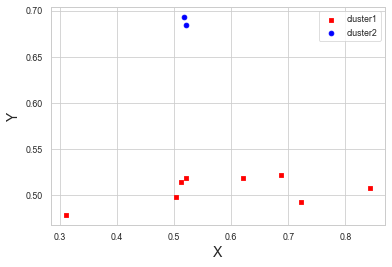

In [80]:
#グラフ
colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
#clusterはnp.array型じゃないとダメそう(リスト型だとグラフに描画されなかった)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])

#ax.set_title('fecbo', size=16)
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2'])  # 凡例を表示

plt.show()

fig.savefig("img2d.pdf")

In [81]:
print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))
print(u_list)

クラスター中心はcluster1:[0.58248042 0.52256622],cluster2:[0.56917958 0.56360058]
[[0.51280855 0.48719145]
 [0.58719861 0.41280139]
 [0.27579563 0.72420437]
 [0.55980914 0.44019086]
 [0.60536787 0.39463213]
 [0.17072359 0.82927641]
 [0.55867932 0.44132068]
 [0.56242751 0.43757249]
 [0.55893175 0.44106825]
 [0.60825805 0.39174195]]


In [82]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  n


Nothing done.


In [83]:
p

[0.0007403055559999994,
 0.03822570388899998,
 0.00010901555600000018,
 0.032134479444999975,
 0.027225695555999976,
 0.00010137944500000041,
 0.0,
 0.030344904444999977,
 0.041001691111999986,
 0.08168416388899997,
 0.030344904444999977,
 0.0,
 0.10412108497800004,
 0.14067954388900006,
 0.009999999999999995,
 0.04101150444499998,
 0.02751202444500001,
 0.05780138777800003,
 0.04569999999999999,
 0.08857832444499997]